# SVMs for linear and non-linear classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# 1. Load dataset
df = pd.read_csv("breast-cancer.csv")
df = df.drop(columns=["id"])  # Drop ID
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})  # Encode target

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

In [3]:
# 2. Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
# 4. Train SVM (Linear Kernel)
svm_linear = SVC(kernel="linear", C=1, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

In [6]:
# 5. Train SVM (RBF Kernel)
svm_rbf = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("🔹 Linear SVM Accuracy:", acc_linear)
print("🔹 RBF SVM Accuracy:", acc_rbf)
print("\nClassification Report (RBF SVM):\n", classification_report(y_test, y_pred_rbf))

🔹 Linear SVM Accuracy: 0.9649122807017544
🔹 RBF SVM Accuracy: 0.9736842105263158

Classification Report (RBF SVM):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [7]:
# 6. Hyperparameter tuning with GridSearchCV
param_grid = {"C": [0.1, 1, 10], "gamma": ["scale", 0.01, 0.1, 1], "kernel": ["rbf"]}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("\n✅ Best Parameters:", grid.best_params_)
print("✅ Best CV Accuracy:", grid.best_score_)


✅ Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
✅ Best CV Accuracy: 0.9736263736263737


In [8]:
# 7. Cross-validation score
cv_scores = cross_val_score(SVC(kernel="rbf", C=grid.best_params_["C"], gamma=grid.best_params_["gamma"]),
                            X_scaled, y, cv=5)
print("\nCross-validation accuracy scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-validation accuracy scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV Accuracy: 0.9736376339077782


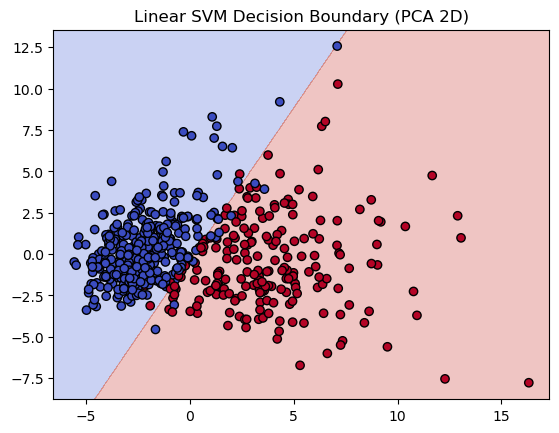

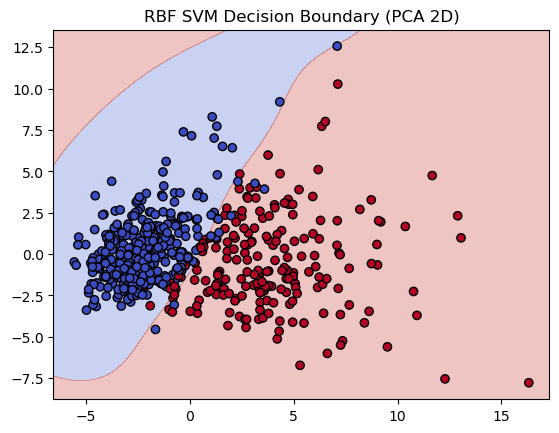

In [9]:
# 8. Visualization using PCA (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

# Train again on PCA-reduced data for visualization
svm_linear_pca = SVC(kernel="linear", C=1)
svm_linear_pca.fit(X_pca, y)

svm_rbf_pca = SVC(kernel="rbf", C=1, gamma="scale")
svm_rbf_pca.fit(X_pca, y)

plot_decision_boundary(svm_linear_pca, X_pca, y, "Linear SVM Decision Boundary (PCA 2D)")
plot_decision_boundary(svm_rbf_pca, X_pca, y, "RBF SVM Decision Boundary (PCA 2D)")